In [1]:
!pip install nltk scikit-learn
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.8 MB/s  0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/8.7 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.7 MB

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

In [2]:
import pandas as pd
import nltk
import json
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
from collections import Counter
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
## loading datasets train and test
train_data = pd.read_csv('/content/sample_data/train.csv')
test_data = pd.read_csv('/content/sample_data/train.csv')

## loading stopwords dataset
with open('/content/sample_data/turkce_stopwords.json', 'r', encoding='utf-8') as file:
    stopwords_data = json.load(file)
turkish_stopwords = set(stopwords_data['stopwords'])


In [5]:
## showing train dataset
print("Train Data Sample:")
print(train_data.head())

Train Data Sample:
                                                text     label         dataset
0  ürünü hepsiburadadan alalı 3 hafta oldu. orjin...  Positive  urun_yorumlari
1  ürünlerden çok memnunum, kesinlikle herkese ta...  Positive  urun_yorumlari
2      hızlı kargo, temiz alışveriş.teşekkür ederim.  Positive  urun_yorumlari
3               Çünkü aranan tapınak bu bölgededir .      Notr            wiki
4  bu telefonu başlıca alma nedenlerim ise elimde...  Positive  urun_yorumlari


In [ ]:
################################################# tensorflow ###########################################################

In [35]:
train_data = train_data.sample(frac=0.5, random_state=42)
test_data = test_data.sample(frac=0.5, random_state=42)

# Preprocessing text: Lowercase, remove stopwords, and remove punctuation
def preprocess_text(text, stop_words):
    # Remove punctuation using regex
    text = text.lower() # Lowercase text first
    text = "".join([char for char in text if char.isalnum() or char.isspace()])  # Keep only alphanumeric and spaces
    # Split the text into words
    words = text.split()  # Split into a list of words
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    # Join back the words into a sentence
    return ' '.join(filtered_words)  # Join back into a single string

print("\nPreprocessing text data...")
train_data['processed_text'] = train_data['text'].apply(lambda x: preprocess_text(x, turkish_stopwords))
test_data['processed_text'] = test_data['text'].apply(lambda x: preprocess_text(x, turkish_stopwords))
print("Datasets are ready!")

# Tokenization and vectorization using TensorFlow
max_features = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_data['processed_text'])

X_train = tokenizer.texts_to_sequences(train_data['processed_text'])
X_test = tokenizer.texts_to_sequences(test_data['processed_text'])

# Pad sequences to ensure consistent length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100, padding='post')

# Convert labels to categorical format
label_map = {'Negative': 0, 'Notr': 1, 'Positive': 2}
y_train = train_data['label'].map(label_map).values
y_test = test_data['label'].map(label_map).values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=500),  # Reduced output_dim
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),  # Reduced units
    tf.keras.layers.Dense(3, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nTraining the model...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes) * 100
print(f"\nAccuracy: {accuracy:.2f}%")
print(classification_report(y_test_classes, y_pred_classes))


# Function to predict sentiment of new text
def predict_sentiment(text):
    processed_text = preprocess_text(text, turkish_stopwords).numpy().decode('utf-8')
    vectorized_text = tokenizer.texts_to_sequences([processed_text])
    padded_text = tf.keras.preprocessing.sequence.pad_sequences(vectorized_text, maxlen=100, padding='post')
    prediction = model.predict(padded_text)[0]
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    predicted_class = np.argmax(prediction)
    return sentiment_map[predicted_class], prediction
# Test the model with new input
print("\nTest with new input...")

def predict_sentiment(text):
    processed_text = preprocess_text(text, turkish_stopwords)
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    probabilities = model.predict(vectorized_text)[0]
    sentiment_index = tf.argmax(probabilities).numpy()
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    predicted_sentiment = sentiment_map[sentiment_index]

    return predicted_sentiment, probabilities


user_input = input("Enter a Turkish sentence for sentiment analysis: ")
try:
    sentiment, probabilities = predict_sentiment(user_input)
    print(f"\nSentiment: {sentiment}")
    print("Probabilities:")
    print(f"  Negative: {probabilities[0]:.4f}")
    print(f"  Neutral: {probabilities[1]:.4f}")
    print(f"  Positive: {probabilities[2]:.4f}")
except Exception as e:
    print(f"Error processing input: {e}")




Preprocessing text data...
Datasets are ready!

Training the model...
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7240 - loss: 0.6392 - val_accuracy: 0.8959 - val_loss: 0.3306
Epoch 2/3
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8860 - loss: 0.3177 - val_accuracy: 0.8894 - val_loss: 0.3024
Epoch 3/3
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8990 - loss: 0.2846 - val_accuracy: 0.9086 - val_loss: 0.2548
3443/3443 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Accuracy: 90.86%
              precision    recall  f1-score   support

           0       0.92      0.51      0.66     12756
           1       0.92      0.97      0.95     38307
           2       0.90      0.95      0.93     59107

    accuracy                           0.91    110170
   macro avg       0.91      0.81      0.84    110170
weighted avg       0.91      0.91      0.90    110170


Test with new input...
Enter a Turkish sentence for sentiment analysis: gercekten iyi bir cihaz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Sentiment: Neutral
Probabilities:
  Negative

In [ ]:
######################################### NLTK ######################################

In [29]:
train_data = train_data.sample(frac=0.7, random_state=42)  # Use 20% of the training data

## lowercasing, removing stopwords, and punctuation the text
def preprocess_text(text, stop_words):
    words = nltk.word_tokenize(text.lower())
    processed_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(processed_words)

In [30]:
## creating new raw dataset
print("\nPreprocessing text data...")
train_data['processed_text'] = train_data['text'].apply(lambda x: preprocess_text(x, turkish_stopwords))
test_data['processed_text'] = test_data['text'].apply(lambda x: preprocess_text(x, turkish_stopwords))
print("datasets are ready")


Preprocessing text data...
datasets are ready


In [31]:
## tf-idf vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['processed_text']).toarray()
X_test = vectorizer.transform(test_data['processed_text']).toarray()
y_train = train_data['label']
y_test = test_data['label']

              precision    recall  f1-score   support

    Negative       0.74      0.58      0.65     25475
        Notr       0.96      0.85      0.90     76828
    Positive       0.84      0.94      0.89    118037

    accuracy                           0.87    220340
   macro avg       0.85      0.79      0.81    220340
weighted avg       0.87      0.87      0.87    220340

Accuracy: 86.90%


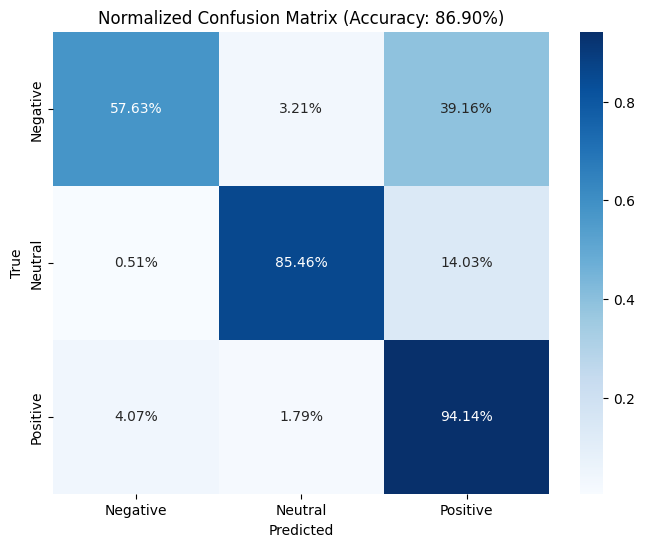

In [32]:
## create model
model = MultinomialNB()
model.fit(X_train, y_train)
## evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
## graphics for accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title(f'Normalized Confusion Matrix (Accuracy: {accuracy:.2f}%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
## predict the sentiment of a new text
def predict_sentiment(text):
    processed_text = preprocess_text(text, turkish_stopwords)
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(vectorized_text)[0]
    probabilities = model.predict_proba(vectorized_text)[0]
    sentiment_map = {'Negative': 'Negative', 'Notr': 'Neutral', 'Positive': 'Positive'}
    return sentiment_map[prediction], probabilities


In [34]:
## new text input
print("\nTest with new input...")
user_input = input("Enter a Turkish sentence for sentiment analysis: ")
sentiment, probabilities = predict_sentiment(user_input)
print(f"\nSentiment: {sentiment}")
print("Probabilities:")
print(f"  Negative: {probabilities[0]:.4f}")
print(f"  Neutral: {probabilities[1]:.4f}")
print(f"  Positive: {probabilities[2]:.4f}")


Test with new input...
Enter a Turkish sentence for sentiment analysis: good

Sentiment: Positive
Probabilities:
  Negative: 0.1154
  Neutral: 0.3482
  Positive: 0.5363


In [ ]:
#############################  data process ########################

In [ ]:

file_path = "/content/turkce_stopwords.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

stopwords = data["stopwords"]
stopwords_df = pd.DataFrame(stopwords, columns=["Stopwords"])

print(stopwords_df.head(10))

In [ ]:
df1 = pd.read_csv(r'/content/test.csv')
df1.sample(10)

,text,label,dataset
35649,Dar gelirli insanlar genelde bu sitede kalmaz .,Notr,wiki
24399,daha önce kullandığımızın hava subobu içinde g...,Positive,urun_yorumlari
20202,pişmanlikçelik palas otelde yapmiş olduğum kon...,Negative,HUMIR
47631,Bu silahlar hem saldırı hem de savunma amaçlı ...,Notr,wiki
34541,İsteğe bağlı olarak iki çağrı aynı anda alınab...,Notr,wiki
26859,teşekkürler :),Positive,urun_yorumlari
26541,perşembe saat 5 te sipariş verdim,Positive,urun_yorumlari
1267,İlçenin merkezi Norman şehridir .,Notr,wiki
26726,bence de doğru olan bu,Positive,tweet-pn
10532,Hamdi Akın Vakfın Onursal Başkanı’dır .,Notr,wiki


In [ ]:
df1.shape

(48965, 3)

In [ ]:
df1.columns

Index(['text', 'label', 'dataset'], dtype='object')

In [ ]:
list(df1)

['text', 'label', 'dataset']

In [ ]:
df1['label'].unique()

array(['Notr', 'Positive', 'Negative'], dtype=object)

In [ ]:
df1['label'].value_counts()

,count
label,
Positive,26217
Notr,17092
Negative,5656


In [ ]:
df2 = df1.drop(['text'], axis='columns')
df2.shape

(48965, 2)

In [ ]:
df2.isnull().sum()

,0
label,0
dataset,0


In [ ]:
df3=df2.dropna()
df3.isnull().sum()

,0
label,0
dataset,0


In [ ]:
df3.sample(5)

,label,dataset
29136,Positive,urun_yorumlari
16409,Positive,urun_yorumlari
37792,Negative,urun_yorumlari
48101,Negative,magaza_yorumlari
20354,Positive,urun_yorumlari


In [ ]:
################## train ######################

In [ ]:
df4 = pd.read_csv(r'/content/train.csv')
df4.sample(10)

,text,label,dataset
211169,zaman kaybından başka bir şey değil...stephen...,Negative,HUMIR
148831,Sezon sonu ise takımla olan sözleşmesi karşılı...,Notr,wiki
301568,arkadaşlar aldım hemen iade ettim.halıda yürüt...,Negative,urun_yorumlari
312823,gereksiz izlemesenizde olur türden bir film. ...,Negative,HUMIR
342607,İki şarkı dışında bütün şarkıların sözleri Maz...,Notr,wiki
172837,Bu kitap Hakikat Kitabevi tarafından ofset yol...,Notr,wiki
186017,Osmanlı İmparatorluğu zamanında yapılmıştır .,Notr,wiki
147193,Pennsylvania Güzel Sanatlar Akademisi Resmi Sa...,Notr,wiki
232150,Lakin; daha sonra After the Fall serisi ile bi...,Notr,wiki
146924,Ancak eşinin ölümünden sonra politikaya karışm...,Notr,wiki


In [ ]:
df4.shape

(440679, 3)

In [ ]:
df4.columns

Index(['text', 'label', 'dataset'], dtype='object')

In [ ]:
df4['text'].unique()

array(['ürünü hepsiburadadan alalı 3 hafta oldu. orjinal ve eksiksiz şekilde geldi. şarj konusunda 1 günü rahat çıkarıyor oyun oynamama rağmen. teslimat sürecide hızlı gerçekleşti. en uygun fiyata iphone kalitesi kaçırmayın..',
       'ürünlerden çok memnunum, kesinlikle herkese tavsiye ederim. ayrıca hepsiburada ya süper hızlı gönderim için teşekkür ederim.',
       'hızlı kargo, temiz alışveriş.teşekkür ederim.', ...,
       'kullandım ve çok memnun kaldım. ocak başında dakika tutmaya gerek yok',
       'Adını Lenkeran şehrinden almıştır .',
       'Bu dergilerde sosyalist teori ve siyasete ilişkin yazılar yazdı .'],
      dtype=object)

In [ ]:
df4['text'].value_counts()

,count
text,
Memnun kaldık.,17
Cok memnun kaldık.,11
Çok kullanışlı.,9
Harikaydı.,8
mükemmel,7
...,...
Çok güzel bir oteldi gerçek bir tatil yaşadım süperdi ... Herkese tavsiye ediyorum gerçekten bir tatil arayanlara turunç otel doğa içinde denizi muhteşem inanamazsınız ben hayatımda böyle bir deniz görmedim zaten turunça yürüme mesafesinde uçakla gittik ama dağlara tırmanmak çok zevkliydi ulaşımı biraz zor ama buna rağmen bir taraf deniz bir taraf yeşillik ormanlar herkese tavsiyem turunç otel annemin isteği üzerine gittik normalde 1 haftalık tatilimizi ben 3 hafta yaptım muhteşem ötesi idi denizi çok huzurluydu titanic otelde (antalya) oranın denizini çok beğeniyordum ama favori denizim bu ve ben seneye de rezarvasyon yaptıracağım herkese tavsiye ederim.,1
Bu görevinden önce Çin Komünist Partisi Hunan Komitesi Sekreterliğini sürdürmüştür .,1
"ürün çok şık.orjinal.fiyat uygun.kargo 2 günde geldi.sorunsuz bir alışverişti,teşekkürler",1


In [ ]:
df4['dataset'].unique()

array(['urun_yorumlari', 'wiki', 'HUMIR', 'tweet-pn', 'magaza_yorumlari',
       'random'], dtype=object)

In [ ]:
df4['dataset'].value_counts()

,count
dataset,
urun_yorumlari,210693
wiki,153364
HUMIR,58575
tweet-pn,9959
magaza_yorumlari,7627
random,461


In [ ]:
df4['label'].unique()

array(['Positive', 'Notr', 'Negative'], dtype=object)

In [ ]:
df4['label'].value_counts()

,count
label,
Positive,235949
Notr,153825
Negative,50905


<ipython-input-33-8900f9cf2b38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df4, x='label', palette="viridis")


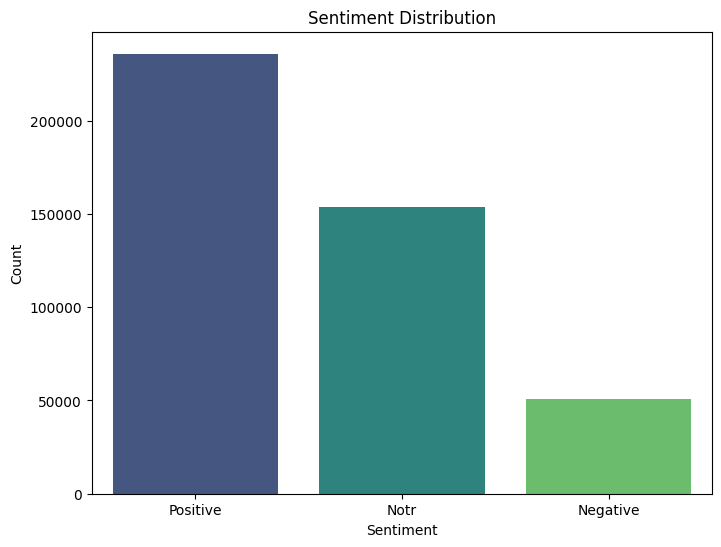

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df4, x='label', palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
############################# FEature engineering #############################################

In [ ]:
df4 = df4.drop(['dataset'], axis='columns')
df4.shape
df4.sample(5)

,text,label
336973,Bu aşamada Harvard Üniversitesi’nden Karl Deut...,Notr
136874,Sonuçta ortada binbir zorlukla çekildigi bell...,Negative
200511,Stadyumda Suriye Milli takımının maçları da ya...,Notr
328620,Top ve uçaksavar eksikliği vardı .,Notr
94568,yorumlara bakarak aldım ilk izlenim güzel ve o...,Positive


In [ ]:
df4_po = df4[df4['label'] == 'Positive']
df4_ne = df4[df4['label'] == 'Negative']
df4_not = df4[df4['label'] == 'Notr']

In [ ]:
df4_po.to_csv("positive_sentiments.csv", index=False)
df4_ne.to_csv("negative_sentiments.csv", index=False)
df4_not.to_csv("notr_sentiments.csv", index=False)